# Predicting type of crime in LA on given Time and location


### Dataset Description 

#### Columns
    
* DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.
* API Field Name: MM/DD/YYYY.
* DATE OCC: MM/DD/YYYY.
* TIME OCC: In 24 hour military time.
* AREA: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
* AREA NAME: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South * * Broadway and 77th Street, serving neighborhoods in South Los Angeles.
* Rpt Dist No: A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons.
* Crm Cd: Indicates the crime committed. (Same as Crime Code 1)
* Crm Cd Desc: Defines the Crime Code provided.
* Mocodes: Modus Operandi: Activities associated with the suspect in commission of the crime.
* Vict Age: Two character numeric.
* Vict Sex: F - Female M - Male X - Unknown.
* Vict Descent: Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian.
* Premis Cd: The type of structure, vehicle, or location where the crime took place.
* Premis Desc: Defines the Premise Code provided.
* Weapon Used Cd: The type of weapon used in the crime.
* Weapon Desc: Defines the Weapon Used Code provided.
* Status: Status of the case. (IC is the default).
* Status DEsc: Defines the Status Code provided.
* Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
* Crm Cd 2: May contain a code for an additional crime, less serious than Crime Code 1.
* Crm Cd 3: May contain a code for an additional crime, less serious than Crime Code 1.
* Crm Cd 4: May contain a code for an additional crime, less serious than Crime Code 1.
* LOCATION: Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
* Cross Street: Cross Street of rounded Address.
* LAT: Latitude.
* LON: Longitude.

### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

The libraries is vital fro my dataset, because it will help us as a student to not restate the code upon implementing our data analysis.

In [2]:
#Load data
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,201220752,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,12,77th Street,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,700 E 73RD ST,NaN,33.9739,-118.2630
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


This is the head of our dataset that visualize the first 5 rows and the 28 columns of our dataset. 

# Columns in Dataset

In [3]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

This is the columns of our dataset and this help us to see the names of columns of our dataset.

### Data Preprocessing

In [4]:
#checking for data info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276584 entries, 0 to 276583
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           276584 non-null  int64  
 1   Date Rptd       276584 non-null  object 
 2   DATE OCC        276584 non-null  object 
 3   TIME OCC        276584 non-null  int64  
 4   AREA            276584 non-null  int64  
 5   AREA NAME       276584 non-null  object 
 6   Rpt Dist No     276584 non-null  int64  
 7   Part 1-2        276584 non-null  int64  
 8   Crm Cd          276584 non-null  int64  
 9   Crm Cd Desc     276584 non-null  object 
 10  Mocodes         238591 non-null  object 
 11  Vict Age        276584 non-null  int64  
 12  Vict Sex        240227 non-null  object 
 13  Vict Descent    240222 non-null  object 
 14  Premis Cd       276580 non-null  float64
 15  Premis Desc     276487 non-null  object 
 16  Weapon Used Cd  101085 non-null  float64
 17  Weapon Des

We use df.info in order for us to know the number of object, d types and the non null values inside of our dataset.

In [6]:
# Removing irrelevant/not meaningfull columns

In [7]:
# from discrption of columns data there are some columns don't needed so we drop them
col = ['Date Rptd','DR_NO','AREA NAME', 'Mocodes', 'Premis Desc', 'Weapon Desc', 'Status Desc','Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street','Weapon Used Cd']
df = df.drop(col,axis=1)

# Handeling null values 

In [8]:
df.isna().sum()/df.shape[0]

DATE OCC        0.000000
TIME OCC        0.000000
AREA            0.000000
Rpt Dist No     0.000000
Part 1-2        0.000000
Crm Cd          0.000000
Crm Cd Desc     0.000000
Vict Age        0.000000
Vict Sex        0.131450
Vict Descent    0.131468
Premis Cd       0.000014
Status          0.000000
LOCATION        0.000000
LAT             0.000000
LON             0.000000
dtype: float64

In [9]:
# filling victim sex empty rows with mode value
df["Vict Sex"].fillna(df["Vict Sex"].mode()[0],inplace=True)

# filling victim descent empty rows with "X" unknown symbol 
df["Vict Descent"].fillna(df["Vict Descent"].mode()[0],inplace=True)

In [10]:
# Converting the date column to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

In [11]:
# Extracting year, month, day into separate columns - This would be useful for machine learning model
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['day'] = df['DATE OCC'].dt.day
df['day_of_week'] = df['DATE OCC'].dt.day_name()

In [12]:
# Converting time to string
df['TIME OCC'] = df['TIME OCC'].astype('str')

# converting the column with 4 digits
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: x.zfill(4))

# extracting hour and minute
df['hour'] = df['TIME OCC'].str[:2]
df['minute'] = df['TIME OCC'].str[2:]

In [13]:
df.head()

,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,LOCATION,LAT,LON,year,month,day,day_of_week,hour,minute
0,2020-01-08,2230,3,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,AO,1100 W 39TH PL,34.0141,-118.2978,2020,1,8,Wednesday,22,30
1,2020-01-01,0330,1,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,IC,700 S HILL ST,34.0459,-118.2545,2020,1,1,Wednesday,03,30
2,2020-09-16,1230,12,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,...,IC,700 E 73RD ST,33.9739,-118.2630,2020,9,16,Wednesday,12,30
3,2020-01-01,1730,15,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,IC,5400 CORTEEN PL,34.1685,-118.4019,2020,1,1,Wednesday,17,30
4,2020-01-01,0415,19,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,IC,14400 TITUS ST,34.2198,-118.4468,2020,1,1,Wednesday,04,15


This is the head our that has already the converted columns which is the date and time. 

In [14]:
# Adding a col with Voilent and non voilent crime 

In [15]:
import re

# Regular expressions for violent and non-violent crimes
violent_patterns = [
    r'\bRAPE\b', r'\bASSAULT\b', r'\bROBBERY\b', r'\bMURDER\b', r'\bBATTERY\b', r'\bKIDNAPPING\b', r'\bARSON\b', r'\bMANSLAUGHTER\b',
    r'\bDEADLY WEAPON\b', r'\bORAL COPULATION\b', r'\bSEXUAL PENETRATION\b', r'\bSTALKING\b', r'\bLEWD CONDUCT\b', r'\bCHILD ABUSE\b'
]

non_violent_patterns = [
    r'\bTHEFT\b', r'\bFRAUD\b', r'\bBURGLARY\b', r'\bVANDALISM\b', r'\bTRESPASSING\b', r'\bEMBEZZLEMENT\b', r'\bFORGERY\b', r'\bDISORDERLY CONDUCT\b',
    r'\bDISRUPTING PEACE\b', r'\bCRIMINAL DAMAGE\b', r'\bSTOLEN PROPERTY\b', r'\bIDENTITY THEFT\b', r'\bCREDIT CARD FRAUD\b', r'\bBUNCO\b',
    r'\bPROPERTY DAMAGE\b', r'\bCONSPIRACY\b', r'\bDOCUMENT FORGERY\b', r'\bEXTORTION\b', r'\bBRIBERY\b', r'\bCONTRIBUTING TO DELINQUENCY\b',
    r'\bANIMAL CRUELTY\b', r'\bILLEGAL DUMPING\b', r'\bHUMAN TRAFFICKING\b', r'\bINCEST\b'
]

In [16]:
df["Crm Cd Desc"] = df["Crm Cd Desc"].astype(str)  # Converting the column to string

# The following function classifies crimes as violent or non-violent using regular expressions
def classify_crime(description):
    for pattern in violent_patterns:
        if re.search(pattern, description, re.IGNORECASE):
            return 'violent'
    for pattern in non_violent_patterns:
        if re.search(pattern, description, re.IGNORECASE):
            return 'non-violent'
    return 'unknown'

# Classify the crimes
df["Crime"] = df["Crm Cd Desc"].apply(classify_crime)

In [17]:
df["Crime"].value_counts()

Crime
non-violent    135573
violent         78231
unknown         62780
Name: count, dtype: int64

We used this to see the numbers of non-violent, violent, unknown crime. 

In [18]:
# Droping rows with 'unknown' classification
df = df[df["Crime"] != 'unknown']

In [19]:
df['AREA'] = df['AREA'].astype('category')
df['Rpt Dist No'] = df['Rpt Dist No'].astype('category')
df['Premis Cd'] = df['Premis Cd'].astype('category')
df['hour'] = df['hour'].astype('category')
df['minute'] = df['minute'].astype('category')
df['day'] = df['day'].astype('category')
df['month'] = df['month'].astype('category')
df['Status'] = df['Status'].astype('category')
df['Part 1-2'] = df['Part 1-2'].astype('category')

In [20]:
# Extract block number from location so we can add this to our model

import re

# regular expression patterns
pattern_block_number = r'^\d+'

df['block'] = df['LOCATION'].apply(lambda x: re.findall(pattern_block_number, x)[0] if re.findall(pattern_block_number, x) else '')

# replacing empty strings with NaN
df['block'] = df['block'].replace('', pd.NA)

# fill missing values with mode
df['block'] = df['block'].fillna(df['block'].mode().iloc[0])

In [21]:
df.head()

,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,LAT,LON,year,month,day,day_of_week,hour,minute,Crime,block
0,2020-01-08,2230,3,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,34.0141,-118.2978,2020,1,8,Wednesday,22,30,violent,1100
1,2020-01-01,0330,1,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,34.0459,-118.2545,2020,1,1,Wednesday,03,30,violent,700
2,2020-09-16,1230,12,1259,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,...,33.9739,-118.2630,2020,9,16,Wednesday,12,30,non-violent,700
3,2020-01-01,1730,15,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,34.1685,-118.4019,2020,1,1,Wednesday,17,30,non-violent,5400
4,2020-01-01,0415,19,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,34.2198,-118.4468,2020,1,1,Wednesday,04,15,non-violent,14400


In [22]:
# Selecting features for model

In [23]:
features = ['AREA','block','Premis Cd','LAT','LON','hour','day_of_week','Crime']

df = df[features]
df.head()

,AREA,block,Premis Cd,LAT,LON,hour,day_of_week,Crime
0,3,1100,501.0,34.0141,-118.2978,22,Wednesday,violent
1,1,700,102.0,34.0459,-118.2545,03,Wednesday,violent
2,12,700,502.0,33.9739,-118.2630,12,Wednesday,non-violent
3,15,5400,502.0,34.1685,-118.4019,17,Wednesday,non-violent
4,19,14400,409.0,34.2198,-118.4468,04,Wednesday,non-violent


# EDA

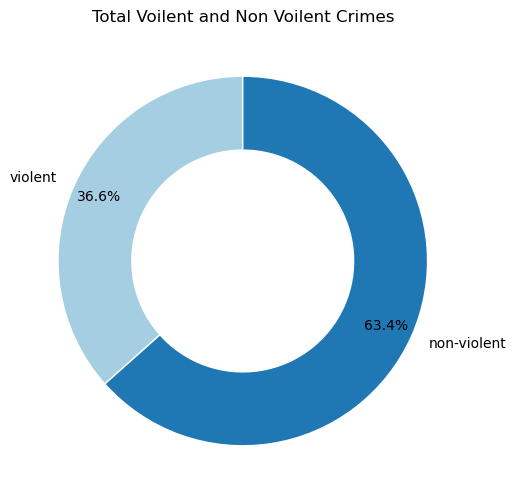

In [24]:
import matplotlib.pyplot as plt

# Grouping the DataFrame by 'Crime' and counting the occurrences
crime_counts = df.groupby('Crime').size().sort_values(ascending=True)

# Creating a donut chart
plt.figure(figsize=(10, 6))
plt.title('Total Voilent and Non Voilent Crimes')

# Data for the donut chart
colors = plt.cm.Paired(range(len(crime_counts)))
wedges, texts, autotexts = plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%',
                                   startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'), colors=colors)

# Increase the size of percentage labels inside the donut chart
for autotext in autotexts:
    autotext.set(size=10)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.setp(wedges, width=0.4)
plt.gca().set_aspect('equal')

plt.show()


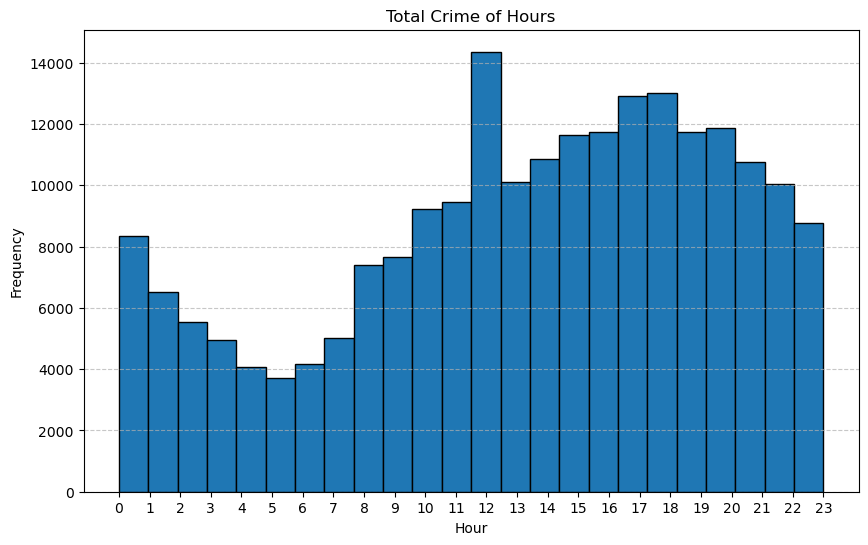

In [25]:
import matplotlib.pyplot as plt

# Convert 'hour' column to integers
df['hour'] = df['hour'].astype(int)

# Assuming df is your DataFrame and 'hour' is the column you want to plot
plt.figure(figsize=(10, 6))
plt.hist(df['hour'], bins=24, edgecolor='black')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Total Crime of Hours')
plt.xticks(range(0, max(df['hour']) + 1))  # Sorting x-ticks from 0 to max hour
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

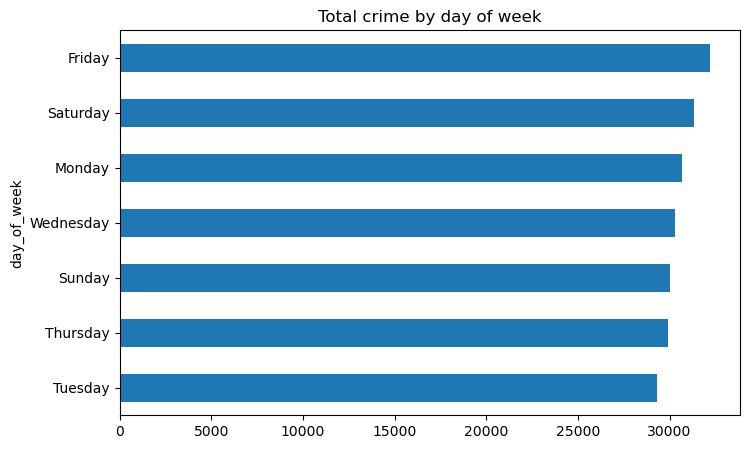

In [26]:
# Plot Bar Chart visualize for Crime Types
plt.figure(figsize=(8,5))
plt.title('Total crime by day of week')
plt.ylabel('day_of_week')
plt.xlabel('Amount of Crimes')

df.groupby([df['day_of_week']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

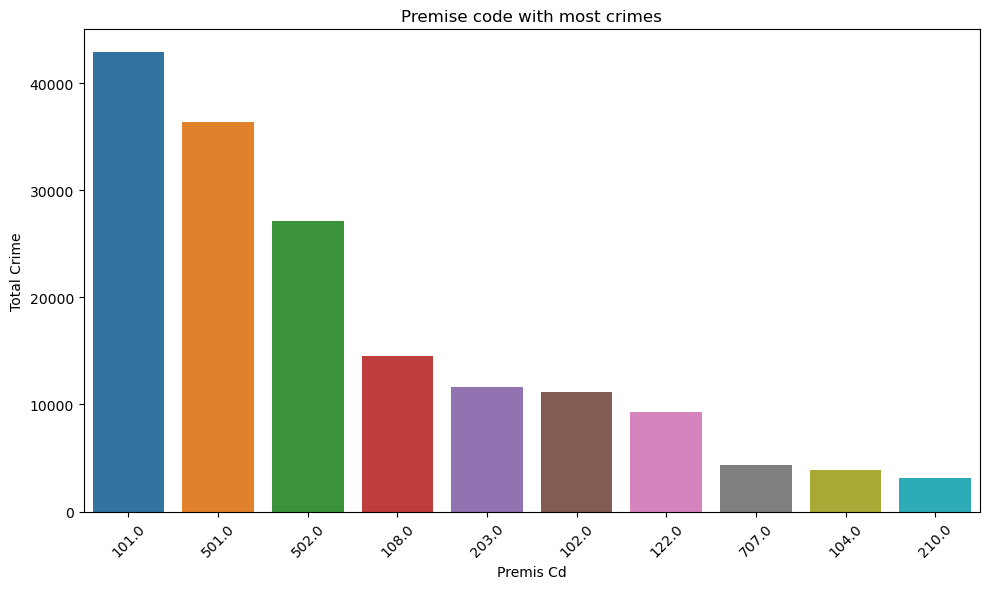

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 10
# top 10 categories
top_categories = df['Premis Cd'].value_counts().nlargest(top_n).index

# Filtering the DataFrame for the top 10 categories
df_top_categories = df[df['Premis Cd'].isin(top_categories)]

# Count plot for the top 10 categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_categories, x='Premis Cd', order=top_categories)
plt.xlabel('Premis Cd')
plt.ylabel('Total Crime')
plt.title('Premise code with most crimes')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Preparing data for ML model

In [28]:
df.head()

,AREA,block,Premis Cd,LAT,LON,hour,day_of_week,Crime
0,3,1100,501.0,34.0141,-118.2978,22,Wednesday,violent
1,1,700,102.0,34.0459,-118.2545,3,Wednesday,violent
2,12,700,502.0,33.9739,-118.2630,12,Wednesday,non-violent
3,15,5400,502.0,34.1685,-118.4019,17,Wednesday,non-violent
4,19,14400,409.0,34.2198,-118.4468,4,Wednesday,non-violent


In [29]:
# defining a dictionary mapping weekday names to integers and target variable ie. Crime to 0 and 1 - Label encoding
weekday_to_int = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# using .map() function to replace the day_of_week and crime column with integers
df['day_of_week'] = df['day_of_week'].map(weekday_to_int)
df['day_of_week'] = df['day_of_week'].astype('category')

crime_map = {
    'non-violent': 0,
    'violent': 1,
}

df['Crime'] = df['Crime'].map(crime_map)
df['Crime'] = df['Crime'].astype('category')

# Reducing the data
df = df.head(50000)

In [30]:
df.shape

(50000, 8)

# Seperating the target and feature ols

In [31]:
x = df.drop(columns=['Crime'])
y = df['Crime']

## Cheking for unique count of voilent and non voilent crimes

In [32]:
y.value_counts() 

Crime
0    34018
1    15982
Name: count, dtype: int64

# Here there are total 135573 'non-voilent' and 135573 'voilent' crime
# Hence the data is imbalance so to fix it we use under-sampling technique to balance the target variable

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the data using RandomUnderSampler
x_resampled, y_resampled = rus.fit_resample(x, y)                                                   

In [34]:
df = x_resampled.join(y_resampled)
df.head()

,AREA,block,Premis Cd,LAT,LON,hour,day_of_week,Crime
43918,8,17300,406.0,34.0419,-118.5540,20,0,0
21751,17,10600,502.0,34.2632,-118.4979,6,2,0
16345,17,600,108.0,34.2573,-118.5273,16,5,0
19261,20,300,101.0,34.0763,-118.3023,19,4,0
599,15,6000,104.0,34.1794,-118.3692,8,0,0


In [35]:
df.Crime.value_counts()

Crime
0    15982
1    15982
Name: count, dtype: int64

In [36]:
# Checking for correlation between independent variables 
df.corr()

,AREA,block,Premis Cd,LAT,LON,hour,day_of_week,Crime
AREA,1.000000,0.371880,0.004672,0.028259,-0.012238,0.008445,-0.000344,-0.018691
block,0.371880,1.000000,0.126404,0.045121,-0.019157,0.007708,0.006932,-0.125394
Premis Cd,0.004672,0.126404,1.000000,-0.022708,0.023440,-0.040184,0.001846,0.020283
LAT,0.028259,0.045121,-0.022708,1.000000,-0.997422,0.010260,0.005851,-0.020955
LON,-0.012238,-0.019157,0.023440,-0.997422,1.000000,-0.009746,-0.005393,0.015550
hour,0.008445,0.007708,-0.040184,0.010260,-0.009746,1.000000,0.016315,0.006023
day_of_week,-0.000344,0.006932,0.001846,0.005851,-0.005393,0.016315,1.000000,-0.025067
Crime,-0.018691,-0.125394,0.020283,-0.020955,0.015550,0.006023,-0.025067,1.000000


# Dropping LON as it is highly correlated with LAT.

In [37]:
df = df.drop(columns=['LON'])

In [38]:
df.head()

,AREA,block,Premis Cd,LAT,hour,day_of_week,Crime
43918,8,17300,406.0,34.0419,20,0,0
21751,17,10600,502.0,34.2632,6,2,0
16345,17,600,108.0,34.2573,16,5,0
19261,20,300,101.0,34.0763,19,4,0
599,15,6000,104.0,34.1794,8,0,0


In [39]:
# One-hot encoding all columns except for LAT, LON, and Crime
df_encoded = pd.get_dummies(df[['AREA','block','Premis Cd','hour','day_of_week']],drop_first=True)

In [40]:
# Concatenating the one-hot encoded columns with the original dataframe
new_df = pd.concat([df[['LAT', 'Crime']], df_encoded], axis=1)

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31964 entries, 43918 to 63003
Columns: 737 entries, LAT to day_of_week_6
dtypes: bool(734), category(1), float64(1), int32(1)
memory usage: 24.0 MB


In [42]:
new_df.head()

,LAT,Crime,hour,AREA_2,AREA_3,AREA_4,AREA_5,AREA_6,AREA_7,AREA_8,...,Premis Cd_968.0,Premis Cd_969.0,Premis Cd_970.0,Premis Cd_971.0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
43918,34.0419,0,20,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21751,34.2632,0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16345,34.2573,0,16,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19261,34.0763,0,19,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
599,34.1794,0,8,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
X = new_df.drop(columns=['Crime'])
y = new_df["Crime"]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,roc_curve, auc
from sklearn.feature_selection import SelectFromModel

In [45]:
#Spliting the dataset to Training Set & Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [46]:
def train_model(clf, X_train, y_train):
    clf.fit(X_train, y_train)

def predict_data(clf, X_test, y_test):
    # Predict labels using the classifier
    y_pred = clf.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)
    
    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    
    # Calculate ROC curve and AUC
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    return f1, acc, con_matrix, class_report, fpr, tpr, roc_auc

def model(clf, X_train, y_train, X_test, y_test):
    train_model(clf, X_train, y_train)
    
    f1, acc, con_matrix, class_report, fpr, tpr, roc_auc = predict_data(clf, X_test, y_test)
    print("Test Data:")
    print("-" * 20)
    print("F1 Score: {}".format(f1))
    print("Accuracy: {}".format(acc))
    print("Confusion Matrix:")
    print(con_matrix)
    print("Classification Report:")
    print(class_report)
    print("-" * 20)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

Logistic Regression
--------------------
Test Data:
--------------------
F1 Score: 0.6717748240813136
Accuracy: 0.6716721414046614
Confusion Matrix:
[[2146 1026]
 [1073 2148]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3172
           1       0.68      0.67      0.67      3221

    accuracy                           0.67      6393
   macro avg       0.67      0.67      0.67      6393
weighted avg       0.67      0.67      0.67      6393

--------------------


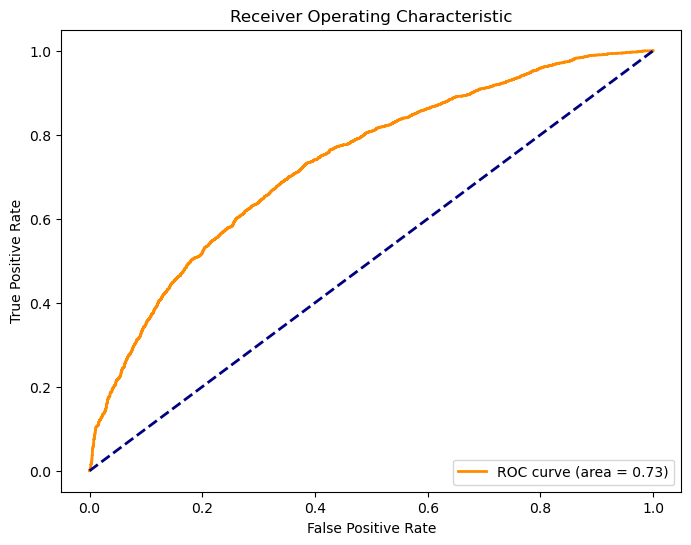

In [47]:
print("Logistic Regression")
print("-" * 20)
lrc = LogisticRegression()
model(lrc, X_train, y_train, X_test, y_test)


Decision Tree
--------------------
Test Data:
--------------------
F1 Score: 0.6375921375921375
Accuracy: 0.6308462380728922
Confusion Matrix:
[[1957 1215]
 [1145 2076]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      3172
           1       0.63      0.64      0.64      3221

    accuracy                           0.63      6393
   macro avg       0.63      0.63      0.63      6393
weighted avg       0.63      0.63      0.63      6393

--------------------


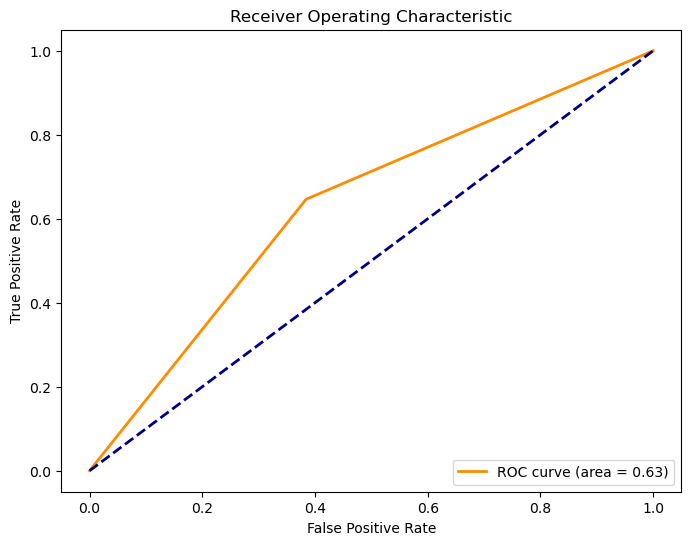

In [48]:
print("\nDecision Tree")
print("-" * 20)
dtc = DecisionTreeClassifier()
model(dtc, X_train, y_train, X_test, y_test)


Random Forest Classifier
--------------------
Test Data:
--------------------
F1 Score: 0.6695815115552779
Accuracy: 0.6690129829501017
Confusion Matrix:
[[2133 1039]
 [1077 2144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      3172
           1       0.67      0.67      0.67      3221

    accuracy                           0.67      6393
   macro avg       0.67      0.67      0.67      6393
weighted avg       0.67      0.67      0.67      6393

--------------------


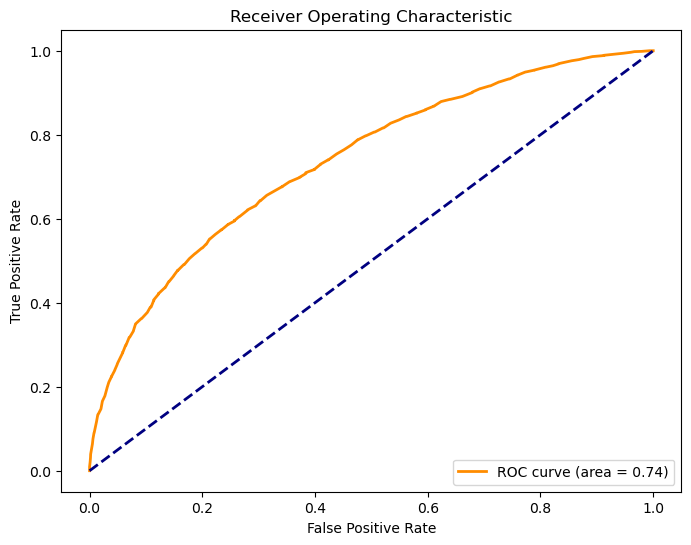

In [49]:
print("\nRandom Forest Classifier")
print("-" * 20)
rfc = RandomForestClassifier(n_estimators=100)
model(rfc, X_train, y_train, X_test, y_test)

# Hyperparameter tuning the Logistic model using Grid search cv and applying cross-validation

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Define F1 score as the evaluation metric
f1_scorer = make_scorer(f1_score)

# Random Forest Classifier (rfc)
rfc_params = {'n_estimators': [100, 150]}
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring=f1_scorer)
rfc_grid.fit(X_train, y_train)

# Best parameters and results
print("Best Parameters for Random Forest: ", rfc_grid.best_params_)
print("Cross-validated F1 Score: {:.2f}".format(rfc_grid.best_score_))

Best Parameters for Random Forest:  {'n_estimators': 150}
Cross-validated F1 Score: 0.69


In [51]:
from sklearn.feature_selection import SelectFromModel

def plot_top_features(clf, X, top_n=5):
    
    # Selecting top features using SelectFromModel
    sfm = SelectFromModel(clf, prefit=True, threshold=-np.inf, max_features=top_n)
    X_transformed = sfm.transform(X)
    
    feature_indices = sfm.get_support(indices=True)
    
    # feature names
    feature_names = X.columns[feature_indices]
    
    # feature importances
    if hasattr(clf, 'coef_'):
        feature_importances = clf.coef_.flatten()[feature_indices]
    elif hasattr(clf, 'feature_importances_'):
        feature_importances = clf.feature_importances_[feature_indices]
    else:
        raise ValueError("Feature importances are not available for this type of classifier.")
    
    # Sorting features by importance values
    sorted_indices = feature_importances.argsort()
    feature_names = feature_names[sorted_indices]
    feature_importances = feature_importances[sorted_indices]

    # Plot 
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), feature_importances[-top_n:], align='center')
    plt.yticks(range(top_n), feature_names[-top_n:])
    plt.xlabel('Feature Importance')
    plt.title(f'Top {top_n} Features Contributing to Crime Type Prediction')
    plt.show()

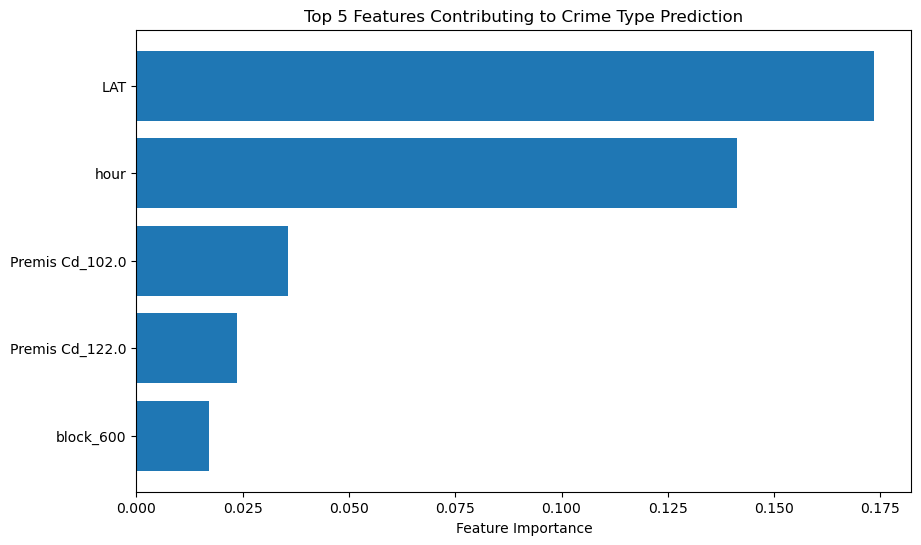

In [52]:
plot_top_features(rfc_grid.best_estimator_, X, top_n=5)